In [6]:
cd /braintree/home/kohitij/lib/matlab/2021_faceEmotion_ASD/
addpath(genpath(pwd))

Load the Behavioral Data

In [13]:
load('data/behavioral_data.mat');

Figure 1B

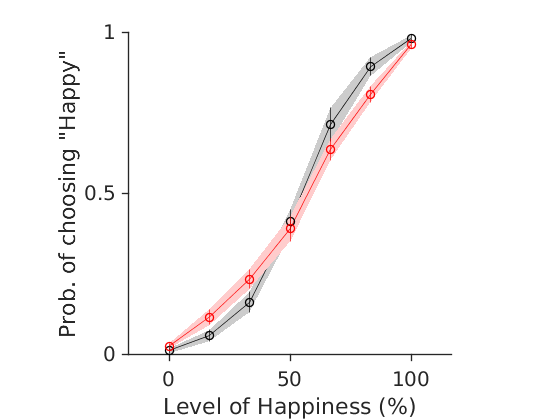

In [50]:
ctrl = get_behavioral_matrix('behavior',behavior, 'condition','ASD_Ctrl');
asd = get_behavioral_matrix('behavior',behavior, 'condition','ASD');

figure;
boundedline(1:7,squeeze(nanmean(nanmean(ctrl(:,:,:),2),3)),squeeze(nanstd(nanmean(ctrl(:,:,:),2),[],3))/sqrt(15),'k')
hold on
boundedline(1:7,squeeze(nanmean(nanmean(asd(:,:,:),2),3)),squeeze(nanstd(nanmean(asd(:,:,:),2),[],3))/sqrt(18),'r')
errorbar(1:7,squeeze(nanmean(nanmean(ctrl,2),3)),squeeze(nanstd(nanmean(ctrl,2),[],3))/sqrt(15),'ko', 'capsize',0)
hold on
errorbar(1:7,squeeze(nanmean(nanmean(asd,2),3)),squeeze(nanstd(nanmean(asd,2),[],3))/sqrt(18),'ro', 'capsize',0)        
polishFigure
set(gca, 'plotboxaspectratio',[1 1 1], 'xtick', [1 4 7], 'ytick', [1 1.5 2], 'yticklabel',{'0','0.5', '1'}, 'xticklabel',{'0', '50', '100'})
ylabel('Prob. of choosing "Happy"')
xlabel('Level of Happiness (%)')

Figure 2B

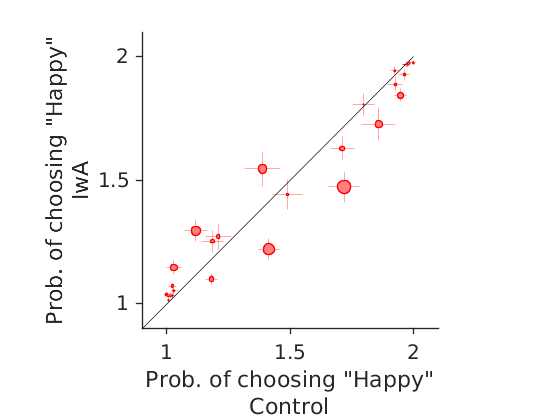

In [51]:
ctrl = get_behavioral_matrix('behavior',behavior, 'condition','ASD_Ctrl');
asd = get_behavioral_matrix('behavior',behavior, 'condition','ASD');

figure;
ctrl = reshape(ctrl,[],size(ctrl,3));
asd = reshape(asd,[],size(asd,3));
nrImages = size(ctrl,1);
x = nanmean(ctrl,2);
y = nanmean(asd,2);
x_err = mad(ctrl,[],2)./sqrt(size(ctrl,2));
y_err = mad(asd,[],2)./sqrt(size(asd,2));
ms = 20*abs(x-y); % just a scaling factor per effect size
for i = 1:nrImages, 
errorbar(x(i),y(i),y_err(i),'o','color', [1 0.5 0.5],...
    'capsize',0, 'markerfacecolor', [1 0.5 0.5], 'markeredgecolor', 'r', 'markersize',ms(i)*2)
hold on
errorbar(x(i),y(i),y_err(i),'horizontal','o','color', [1 0.5 0.5],...
    'capsize',0, 'markerfacecolor', [1 0.5 0.5], 'markeredgecolor', 'r', 'markersize',ms(i)*2)

end
polishFigure
plot([0.9 2],[0.9 2], 'k')
set(gca, 'xtick', [1 1.5 2], 'ytick', [1 1.5 2])
xlabel({'Prob. of choosing "Happy"';'Control'})
ylabel({'Prob. of choosing "Happy"';'IwA'})
xlim([0.9 2.1])
ylim([0.9 2.1])

Figure 2A

mean reliability (control) = 0.73304
mean reliability (asd) = 0.70227


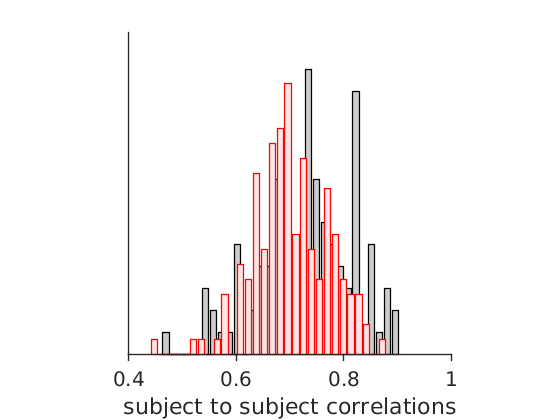

In [52]:
ctrl = get_behavioral_matrix('behavior',behavior, 'condition','ASD_Ctrl');
asd = get_behavioral_matrix('behavior',behavior, 'condition','ASD');
ctrl = reshape(ctrl,[],size(ctrl,3));
asd = reshape(asd,[],size(asd,3));

intcon_ctrl = get_subject_to_subject_corr(ctrl,[]);
intcon_asd = get_subject_to_subject_corr(asd,[]);

[n1,x1]=hist(intcon_ctrl,30);
bar(x1,n1./sum(n1), 'facecolor', [0.8 0.8 0.8],  'edgecolor','k','linewidth',1);
hold on
[n2,x2]=hist(intcon_asd,30);
bar(x2,n2./sum(n2), 'facecolor', [1 0.9 0.9],'edgecolor','r', 'linewidth',1);
set(gca, 'ytick',[])
polishFigure;
xlabel('subject to subject correlations')
disp(['mean reliability (control) = ', num2str(nanmean(intcon_ctrl))])
disp(['mean reliability (asd) = ', num2str(nanmean(intcon_asd))])

Figure 2C


p =

  1.0013e-149


stats = 

  struct with fields:

    tstat: -50.9431
       df: 299
       sd: 0.0290


p =

   4.5244e-93


stats = 

  struct with fields:

    tstat: -30.1842
       df: 299
       sd: 0.0709



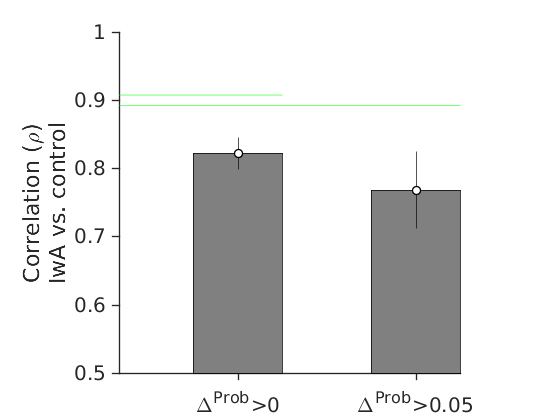

In [71]:
fig = figure;
[ns, raw_corr] = est_noiseCeiling(ctrl,asd,0);
con = nanmean((raw_corr));
con_err = mad((raw_corr));
plot([0 0.55], [nanmean(ns) nanmean(ns)], 'color',[0.2 1 0.2])
hold on
bar(0.4, con,'facecolor', [0.5 0.5 0.5], 'barwidth',0.3)
errorbar(0.4, con, con_err, 'ko', 'markerfacecolor','w', 'capsize',0)
polishFigure;
[~,p, ~,stats]=ttest(raw_corr, mean(ns), 'tail', 'left')

[ns, raw_corr] = est_noiseCeiling(ctrl,asd,0.05);
con = nanmean((raw_corr));
con_err = mad((raw_corr));
plot([0 1.15], [nanmean(ns) nanmean(ns)], 'g','color',[0.2 1 0.2]);
hold on
bar(1, con,'facecolor', [0.5 0.5 0.5], 'barwidth',0.3)
errorbar(1, con, con_err, 'ko', 'markerfacecolor','w', 'capsize',0)
polishFigure;
[~,p, ~,stats]=ttest(raw_corr, mean(ns), 'tail', 'left')
ylim([0.5 1])
ylabel({'Correlation (\rho)'; 'IwA vs. control'})
set(gca, 'xtick', [0.4 1], 'xticklabel', {'\Delta^{Prob}>0','\Delta^{Prob}>0.05'})

Figure 2D

In [83]:
dels = [0:0.01:0.08];
nrDels = length(dels);
val = nan(nrDels,1);
val_err = nan(nrDels,1);
for i = 1:nrDels
    disp(i)
    [ns,raw_corr] = est_noiseCeiling(ctrl,asd,dels(i));
    val(i) = nanmean(ns-raw_corr);
    val_err(i) = prctile(ns-raw_corr,68) - val(i); % error computed as 68% CI
end

     1

     2

     3

     4

     5

     6

     7

     8

     9



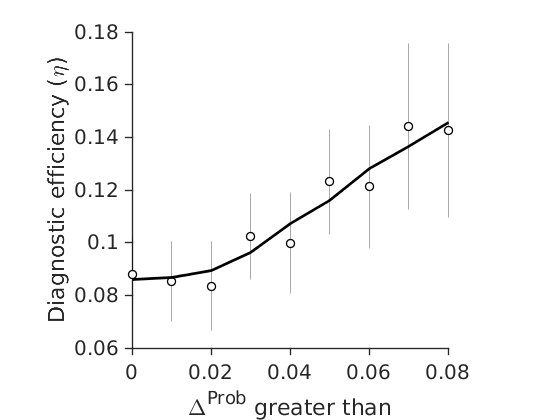

In [90]:
fig=figure;
errorbar(dels,val,val_err,'ko','capsize',0,'linewidth', 0.25, 'markerfacecolor', 'w')
yFit = smooth(dels,val, 'rlowess',2);
hold on
plot(dels,yFit,'k','linewidth',2)
polishFigure
xlabel('\Delta^{Prob} greater than')
ylabel('Diagnostic efficiency (\eta)')

In [80]:
val


val =

    0.0876
    0.0850
    0.0835
    0.1021
    0.0996
    0.1239
    0.1213
       NaN
       NaN

